<a href="https://colab.research.google.com/github/jazaineam1/Andes_ADDBD/blob/main/Sesion19/Sesion19%20Computacion_distribuida_Hadoop_Spark_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Análisis de Datos y Big data***

## ***Universidad de los Andes***
>## **Dirección de Educación Continua.**
>>## **Formación de habilidades escenciales.**

![Imágen1](https://github.com/jazaineam1/Andes_ADDBD/blob/main/Imagenes/Presentaci%C3%B3n-removebg-preview.png?raw=true)




La información adquirida de fuentes externas a menudo no se encuentra en un formato o estructura que pueda procesarse directamente. Para superar estas incompatibilidades y preparar los datos para su almacenamiento y procesamiento, es necesario realizar una manipulación de datos, conocida como "data wrangling". Esto implica pasos para filtrar, limpiar y preparar los datos para su análisis posterior. Desde una perspectiva de almacenamiento, una copia de los datos se almacena inicialmente en su formato de adquisición, y después de la manipulación, los datos preparados deben almacenarse nuevamente. Típicamente, se requiere almacenamiento en los siguientes casos:

- Cuando se adquieren conjuntos de datos externos o se utilizarán datos internos en un entorno de Big Data.
- Cuando se manipulan los datos para que sean adecuados para el análisis de datos.
- Cuando se procesan los datos a través de una actividad ETL (Extract, Transform, Load, Extracción, Transformación y Carga), o se genera un resultado como parte de una operación analítica.

Debido a la necesidad de almacenar conjuntos de datos de Big Data, a menudo en múltiples copias, se han desarrollado estrategias y tecnologías de almacenamiento innovadoras para lograr soluciones de almacenamiento rentables y altamente escalables. Para comprender los mecanismos subyacentes detrás de la tecnología de almacenamiento de Big Data, se introducen los siguientes temas en este capítulo.

### **Cluster**
En informática, un clúster es una colección estrechamente acoplada de servidores o nodos. Estos servidores suelen tener las mismas especificaciones de hardware y están conectados entre sí a través de una red para funcionar como una unidad única,
![](https://www.researchgate.net/publication/271987461/figure/fig6/AS:294930535731212@1447328327460/Cluster-computing-network-technology.png)


 Cada nodo en el clúster tiene sus propios recursos dedicados, como memoria, un procesador y un disco duro. Un clúster puede ejecutar una tarea dividiéndola en pequeñas partes y distribuyendo su ejecución en diferentes computadoras que pertenecen al clúster.


 ### **Distributed File System**

 Resumen:

Un sistema de archivos es el método para almacenar y organizar datos en un dispositivo de almacenamiento, como unidades flash, DVDs y discos duros. Un archivo es una unidad atómica de almacenamiento utilizada por el sistema de archivos para guardar datos. Un sistema de archivos proporciona una vista lógica de los datos almacenados en el dispositivo de almacenamiento y lo presenta como una estructura de árbol de directorios y archivos. Los sistemas operativos utilizan sistemas de archivos para almacenar y recuperar datos en nombre de las aplicaciones. Cada sistema operativo proporciona soporte para uno o varios sistemas de archivos, como NTFS en Microsoft Windows y ext en Linux.

Un sistema de archivos distribuido es un sistema de archivos que puede almacenar archivos grandes distribuidos en los nodos de un clúster.

![](https://github.com/jazaineam1/BigData2023_2/blob/main/Images/Cluster/What_is_DFS_Distributed_File_System.png?raw=true)

 Para el cliente, los archivos parecen ser locales; sin embargo, esta es solo una vista lógica, ya que físicamente los archivos están distribuidos en todo el clúster. Esta vista local se presenta a través del sistema de archivos distribuido y permite que los archivos se accedan desde múltiples ubicaciones. Ejemplos incluyen el Sistema de Archivos de Google (GFS) y el Sistema de Archivos Distribuido Hadoop (HDFS).

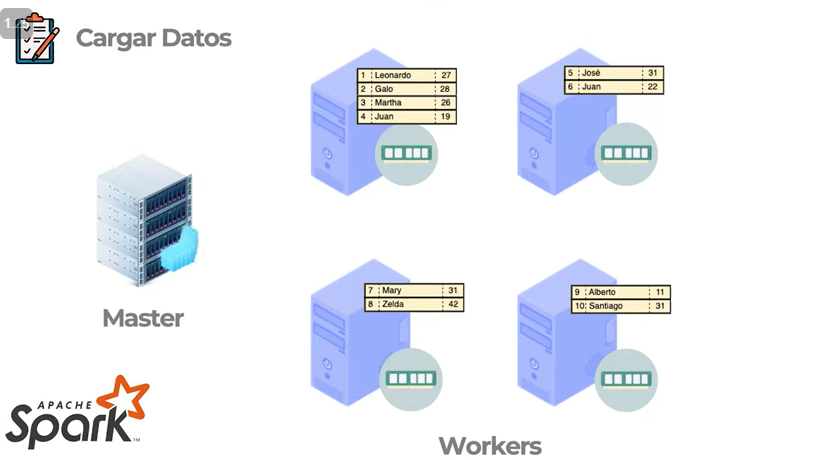

### **Replicación**

La replicación es un proceso que implica almacenar múltiples copias de un conjunto de datos, conocidas como réplicas, en varios nodos. La replicación ofrece escalabilidad y disponibilidad gracias al hecho de que los mismos datos se replican en varios nodos. Además, se logra la tolerancia a fallos debido a que la redundancia de datos asegura que no se pierdan datos cuando un nodo individual falla. Hay dos métodos diferentes que se utilizan para implementar la replicación:

1. **Maestro-Esclavo (Master-Slave):** En este enfoque de replicación, un nodo se designa como el maestro (master) y los demás nodos son esclavos (slaves). El maestro es el nodo principal que recibe las actualizaciones y cambios en los datos, y luego replica esos cambios a los nodos esclavos. Los nodos esclavos mantienen copias idénticas de los datos del maestro y pueden servir lecturas de datos. Este enfoque es útil para distribuir cargas de lectura y proporcionar alta disponibilidad, pero todas las escrituras deben dirigirse al maestro.

![](https://github.com/jazaineam1/BigData2023_2/blob/main/Images/Cluster/Cluster2.png?raw=true)

2. **Par a Par (Peer-to-Peer):** En la replicación entre pares, no hay un nodo maestro y todos los nodos se consideran iguales. Cada nodo en el sistema es tanto un proveedor como un consumidor de datos. Esto significa que cada nodo puede aceptar lecturas y escrituras, y los datos se propagan de manera bidireccional entre los nodos para mantener la consistencia. Este enfoque es beneficioso para una alta escalabilidad y redundancia de datos, ya que no hay un único punto de fallo, pero puede ser más complejo de implementar que la replicación maestro-esclavo.

![](https://github.com/jazaineam1/BigData2023_2/blob/main/Images/Cluster/cluster3.png?raw=true)

La replicación es una estrategia esencial en la administración de datos que proporciona escalabilidad, disponibilidad y tolerancia a fallos al mantener copias redundantes de los datos en múltiples nodos. La elección entre los métodos de replicación maestro-esclavo y par a par depende de los requisitos específicos de la aplicación y de las necesidades de escalabilidad y consistencia de datos.

### **Sharding**

El "sharding" es el proceso de dividir horizontalmente un conjunto de datos grande en una colección de conjuntos de datos más pequeños y manejables llamados "shards" o fragmentos. Estos fragmentos se distribuyen en múltiples nodos, donde un nodo puede ser un servidor o una máquina ![](https://github.com/jazaineam1/BigData2023_2/blob/main/Images/Cluster/cluster4.png?raw=true)

 Cada fragmento se almacena en un nodo separado, y cada nodo es responsable únicamente de los datos almacenados en él. Cada fragmento comparte el mismo esquema (estructura de datos), y en conjunto, todos los fragmentos representan el conjunto de datos completo.

El sharding a menudo es transparente para el cliente, pero esto no es un requisito. El sharding permite la distribución de cargas de procesamiento en múltiples nodos para lograr una escalabilidad horizontal. La escalabilidad horizontal es un método para aumentar la capacidad de un sistema al agregar recursos similares o de mayor capacidad junto a los recursos existentes. Dado que cada nodo es responsable solo de una parte del conjunto de datos completo, los tiempos de lectura y escritura se mejoran significativamente.

![](https://github.com/jazaineam1/BigData2023_2/blob/main/Images/Cluster/cluster5.png?raw=true)

1. Cada fragmento puede atender de manera independiente las lecturas y escrituras para el subconjunto específico de datos de su responsabilidad.

2. Dependiendo de la consulta, puede ser necesario recuperar datos de ambos fragmentos.

Un beneficio del sharding es que proporciona una tolerancia parcial a las fallas. En caso de una falla en un nodo, solo los datos almacenados en ese nodo se ven afectados.

En cuanto a la partición de datos, es necesario tener en cuenta los patrones de consulta para que los propios fragmentos no se conviertan en cuellos de botella de rendimiento. Por ejemplo, las consultas que requieran datos de múltiples fragmentos impondrán penalizaciones de rendimiento. La "localidad de datos" mantiene los datos comúnmente accesados en un solo fragmento y ayuda a contrarrestar estos problemas de rendimiento.

El sharding es una estrategia clave en la administración de datos que permite la distribución de datos en múltiples nodos para lograr escalabilidad horizontal y mejorar el rendimiento de lectura y escritura. Esta técnica se utiliza para manejar grandes volúmenes de datos y distribuir la carga de trabajo de manera eficiente en sistemas de bases de datos y almacenamiento.


## Big Data Conceptos de Procesamiento

La necesidad de procesar grandes volúmenes de datos no es algo nuevo. Cuando consideramos la relación entre un almacén de datos (data warehouse) y sus correspondientes data marts, queda claro que la partición de un conjunto de datos grande en uno más pequeño puede acelerar el procesamiento. Los conjuntos de datos de Big Data almacenados en sistemas de archivos distribuidos o en bases de datos distribuidas ya están particionados en conjuntos de datos más pequeños. La clave para comprender el procesamiento de Big Data es darse cuenta de que, a diferencia del procesamiento centralizado que ocurre dentro de una base de datos relacional tradicional, el Big Data a menudo se procesa en paralelo de manera distribuida en el lugar donde se encuentra almacenado.

Por supuesto, no todo el Big Data se procesa por lotes. Algunos datos tienen la característica de velocidad y llegan en un flujo ordenado en el tiempo. La analítica de Big Data también tiene respuestas para este tipo de procesamiento. Al aprovechar las arquitecturas de almacenamiento en memoria, es posible realizar un análisis en tiempo real para proporcionar conocimiento situacional. Un principio importante que limita el procesamiento de datos en tiempo real de Big Data se llama el principio de Velocidad, Consistencia y Volumen (SCV, por sus siglas en inglés).


### **Procesamiento de datos en paralelo**

El procesamiento de datos en paralelo implica la ejecución simultánea de múltiples sub tareas que en conjunto conforman una tarea más grande. El objetivo es reducir el tiempo de ejecución dividiendo una tarea grande en varias tareas más pequeñas que se ejecutan de manera concurrente.

Aunque el procesamiento de datos en paralelo se puede lograr a través de múltiples máquinas interconectadas en red, generalmente se logra en el ámbito de una sola máquina con múltiples procesadores o núcleos.

![](https://github.com/jazaineam1/BigData2023_2/blob/main/Images/Cluster/cluster6.png?raw=true)


### **procesamiento de datos distribuido**
El procesamiento de datos distribuido está estrechamente relacionado con el procesamiento de datos en paralelo en el sentido de que se aplica el mismo principio de "dividir y conquistar". Sin embargo, el procesamiento de datos distribuido siempre se logra a través de máquinas físicamente separadas que están interconectadas en red como un clúster.

![](https://github.com/jazaineam1/BigData2023_2/blob/main/Images/Cluster/cluster7.png?raw=true)



Una tarea se divide en tres sub tareas que luego se ejecutan en tres máquinas diferentes que comparten un conmutador físico.

Antes de continuar ...

In [ ]:
from IPython.display import HTML

# URL del video de YouTube
video_url = "https://www.youtube.com/embed/1gbdo1Nq-d8"

# Código HTML para incrustar el video
video_html = f'<iframe width="560" height="315" src="{video_url}" frameborder="0" allowfullscreen></iframe>'

# Mostrar el video en una celda de Markdown
HTML(video_html)

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")







Un framework, en el contexto de la programación y el desarrollo de software, es un conjunto de herramientas, bibliotecas y reglas predefinidas que proporciona un punto de partida estructurado para desarrollar aplicaciones o sistemas de software. En lugar de comenzar desde cero al escribir código, los desarrolladores pueden utilizar un framework para acelerar el proceso de desarrollo y seguir prácticas recomendadas.

Por supuesto, aquí están los títulos en negrita con solo cinco emojis:

## **Hadoop** 📊💻

Las siguientes secciones muestran cómo Apache Hadoop y Apache Spark abordan los desafíos de almacenamiento y procesamiento de big data a través de enormes clústeres de computadoras, procesamiento masivamente paralelo, programación Hadoop MapReduce y técnicas de procesamiento en memoria de Spark. Aquí, discutimos Apache Hadoop, una tecnología clave de infraestructura de big data que también sirve como base para muchos avances recientes en el procesamiento de big data y un ecosistema completo de herramientas de software que evolucionan constantemente para satisfacer las necesidades actuales de big data.

### **Resumen de Hadoop** 🌐📈

Cuando Google se lanzó en 1998, la cantidad de datos en línea ya era enorme, con aproximadamente 2.4 millones de sitios web, realmente big data. Hoy en día, hay casi dos mil millones de sitios web (casi un aumento de mil veces) y Google maneja más de dos billones de búsquedas al año. Al haber utilizado la búsqueda de Google desde sus inicios, nuestra impresión es que las respuestas actuales son significativamente más rápidas.

Cuando Google estaba desarrollando su motor de búsqueda, sabían que necesitaban devolver resultados de búsqueda rápidamente. La única forma práctica de hacerlo era almacenar e indexar todo Internet utilizando una combinación inteligente de almacenamiento secundario y memoria principal. Las computadoras de esa época no podían contener esa cantidad de datos ni analizarlos lo suficientemente rápido como para garantizar respuestas rápidas a las consultas de búsqueda. Entonces, Google desarrolló un sistema de agrupación, conectando vastas cantidades de computadoras, llamadas nodos. Dado que tener más computadoras y más conexiones entre ellas significaba una mayor probabilidad de fallas de hardware, también incorporaron altos niveles de redundancia para garantizar que el sistema siguiera funcionando incluso si los nodos dentro de los clústeres fallaban. Los datos se distribuyeron en todas estas "computadoras económicas de bajo costo". Para satisfacer una solicitud de búsqueda, todas las computadoras en el clúster buscaron en paralelo la parte de la web que tenían localmente y luego se recopilaron y reportaron los resultados de esas búsquedas.

Para lograr esto, Google necesitaba desarrollar el hardware y el software de agrupación, incluido el almacenamiento distribuido. Google publica sus diseños, pero no abre su software al código abierto. Los programadores de Yahoo!, trabajando a partir de los diseños de Google en el artículo "Sistema de Archivos de Google", luego construyeron su propio sistema. Abrieron su trabajo al código abierto y la organización Apache implementó el sistema como Hadoop. El nombre provino de un elefante de peluche que pertenecía a un niño de uno de los creadores de Hadoop.

Dos documentos adicionales de Google también contribuyeron a la evolución de Hadoop: "MapReduce: Procesamiento de Datos Simplificado en Grandes Clústeres" y "Bigtable: Un Sistema de Almacenamiento Distribuido para Datos Estructurados", que sirvió de base para Apache HBase (una base de datos NoSQL basada en claves y columnas). 🖥️📚




### HDFS (Hadoop Distributed File System)

**Qué es HDFS:**
- **HDFS** es un sistema de archivos distribuido diseñado para almacenar grandes conjuntos de datos de forma confiable, utilizando hardware de bajo costo. Está organizado en una estructura maestro/esclavo, donde el NameNode es el maestro que gestiona el sistema de archivos y los DataNodes son los esclavos que almacenan los datos. Los archivos se dividen en bloques distribuidos en varios DataNodes para garantizar redundancia y resistencia a fallos.

### MapReduce

**Qué hace MapReduce:**
- **MapReduce** es un modelo de procesamiento que maneja grandes volúmenes de datos en paralelo en un clúster Hadoop. Divide el trabajo en dos fases, Map y Reduce: la fase Map procesa datos y genera pares clave-valor; la fase Reduce toma esos pares y los combina para producir un resultado consolidado. MapReduce permite el procesamiento eficiente distribuyendo las tareas directamente a donde residen los datos.

![](https://github.com/jazaineam1/BigData2023_2/blob/main/Images/Mapreduce.png?raw=true)

### YARN (Yet Another Resource Negotiator)

**Gestión de Recursos con YARN:**
- **YARN** es el gestor de recursos de Hadoop y facilita la ejecución de múltiples aplicaciones de procesamiento de datos de manera eficiente. YARN mejora la escalabilidad y la utilización de recursos mediante la separación de funciones en ResourceManager, que asigna recursos en todo el clúster, y NodeManager, que administra el uso de recursos en cada máquina. Cada aplicación tiene su propio ApplicationMaster para la negociación de recursos y la coordinación de tareas.


![](https://www.researchgate.net/profile/Zhang-Jianbo-2/publication/348387085/figure/fig4/AS:981518453309440@1611023643650/The-overview-of-the-Hadoop-Distributed-File-System-HDFS.ppm)

### **Proveedores de Hadoop**

https://cloud.google.com/learn/what-is-hadoop?hl=es-419


Numerosos proveedores de servicios en la nube ofrecen Hadoop como un servicio, incluyendo Amazon EMR, **Google Cloud DataProc**, IBM Watson Analytics Engine, Microsoft Azure HDInsight y otros.

Además, empresas como Cloudera y Hortonworks  ofrecen componentes y herramientas integradas del ecosistema de Hadoop a través de los principales proveedores de servicios en la nube. También ofrecen entornos descargables gratuitos que puedes ejecutar en tu escritorio para aprender, desarrollar y realizar pruebas antes de comprometerte con la hospedaje basado en la nube, que puede incurrir en costos significativos.


## **Apache Spark** 🚀

En esta sección, exploraremos Apache Spark. Utilizaremos la biblioteca PySpark de Python y las capacidades funcionales de Spark, como filter, map y reduce, para implementar un ejemplo sencillo de conteo de palabras que resume la cantidad de palabras en la obra "Romeo y Julieta". 😃

### **Descripción general de Spark**

Cuando se trata de procesar datos verdaderamente masivos, el rendimiento se vuelve crucial. Hadoop está diseñado principalmente para procesamiento por lotes basado en disco, lo que implica leer datos desde el disco, procesarlos y escribir los resultados de nuevo en el disco. Sin embargo, muchas aplicaciones de big data requieren un rendimiento superior al que se puede lograr con operaciones intensivas en disco. Específicamente, las aplicaciones de transmisión rápida que requieren procesamiento en tiempo real o casi en tiempo real no son adecuadas para una arquitectura basada en disco. ⏱️

### **Historia** 📜

Spark fue creado inicialmente en 2009 en la Universidad de California, Berkeley, y recibió financiamiento de DARPA (la Agencia de Proyectos de Investigación Avanzada de Defensa). En sus primeros días, se concibió como un motor de ejecución distribuida para el aprendizaje automático de alto rendimiento. Spark utiliza una arquitectura en memoria que ha demostrado ordenar 100 terabytes de datos tres veces más rápido que Hadoop MapReduce, todo esto en solo una décima parte de las máquinas. Además, ejecuta algunas cargas de trabajo hasta 100 veces más rápido que Hadoop. 📊

El rendimiento significativamente superior de Spark en tareas de procesamiento por lotes ha llevado a muchas empresas a reemplazar Hadoop MapReduce con Spark. 📈

**Arquitectura y Componentes** 💻

### 1. Almacenamiento
**Resilient Distributed Dataset (RDD)**
- **Función**: Spark utiliza RDD para almacenar datos de manera distribuida y tolerante a fallos a través de clústeres.
- **Características**: Los RDD son inmutables y pueden ser almacenados en memoria o en disco. Su persistencia puede ser configurada para optimizar el acceso a datos frecuentemente utilizados, y cuentan con una recuperación eficiente a través de su linaje en caso de fallos.

### 2. Reducción/Procesamiento
**Transformaciones y Acciones**
- **Procesamiento**: Spark organiza las operaciones en transformaciones "perezosas" (como `map` y `filter`) y acciones que desencadenan la computación (como `count` y `collect`).
- **Optimización**: Utiliza un gráfico acíclico dirigido (DAG) para planificar y ejecutar transformaciones de manera eficiente, optimizando la ejecución y minimizando el trabajo redundante.

### 3. Gestión del Trabajo
**Spark Cluster Manager**
- **Gestión de Clústeres**: Compatible con varios gestores de clúster, como YARN o Mesos, además de su propio modo "standalone".
- **Ejecución**: Un "driver" coordina las tareas, distribuyéndolas a "executors" que realizan el trabajo y devuelven los resultados. Esta estructura facilita una distribución eficiente de tareas y la escalabilidad del procesamiento.

### **Proveedores**

Por lo general, los proveedores de Hadoop también ofrecen soporte para Spark. Además de los proveedores mencionadosanteriormente, existen proveedores específicos de Spark como **Databricks**. Proporcionan una "plataforma en la nube de gestión cero construida en torno a Spark". Su sitio web también es un excelente recurso para aprender Spark. La plataforma de pago de Databricks se ejecuta en Amazon AWS o Microsoft Azure. Databricks también ofrece una edición gratuita llamada Databricks Community Edition, que es una excelente manera de comenzar tanto con Spark como con el entorno de Databricks.

Puedes revisar información adicional en Agile Byte. (2021, junio 23). Agile Byte [Video]. YouTube. https://www.youtube.com/watch?v=sgn6yIERIkw&ab_channel=AgileByte

# Ejercitando con Apache Spark y Python a través de PySpark

El objetivo de esta guía es repasar los conceptos básicos de Spark a través de la resolución de ejercicios con la API para Python, PySpark, para dar soporte a la computación paralela sobre grandes colecciones de datos en un contexto de procesamiento distribuido.
<br /> <br />
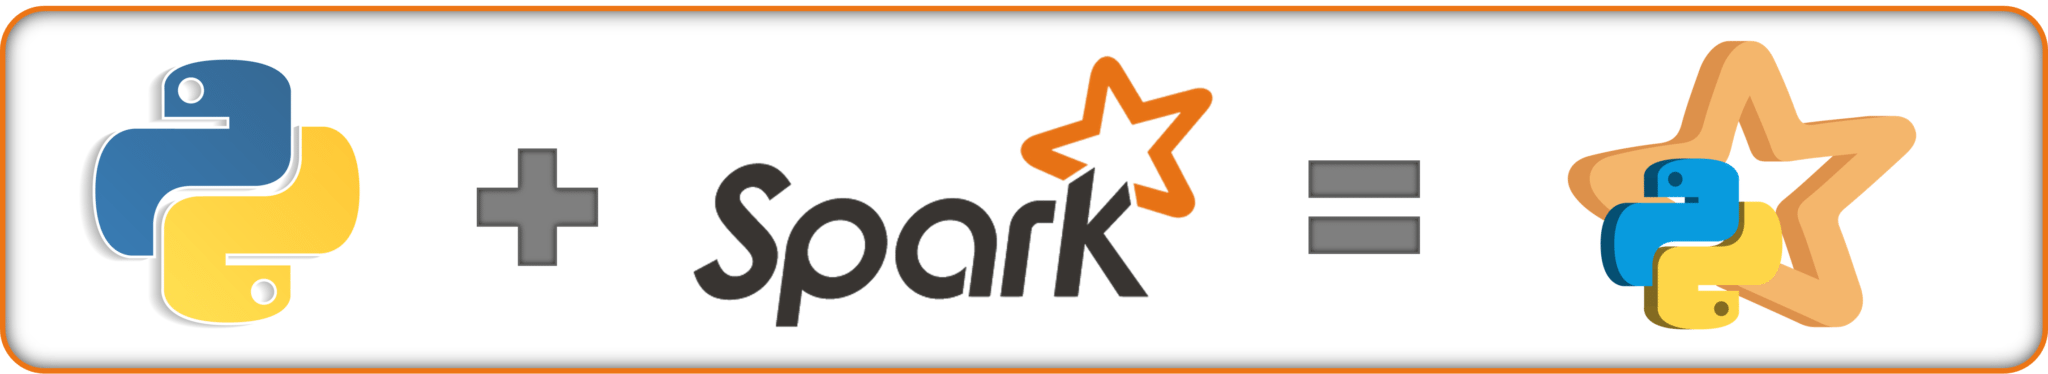

## Introducción a Spark

Las aplicaciones Spark se ejecutan como conjuntos independientes de procesos en un clúster, coordinados por el objeto SparkContext en su programa principal (llamado programa controlador).

Específicamente, para ejecutarse en un clúster, SparkContext puede conectarse a varios tipos de administradores de clústeres (ya sea el administrador de clúster independiente de Spark, Mesos o YARN), que asignan recursos entre aplicaciones. Una vez conectado, Spark adquiere ejecutores en nodos en el clúster, que son procesos que ejecutan cálculos y almacenan datos para su aplicación. A continuación, envía el código de su aplicación (definido por archivos JAR o Python pasados a SparkContext) a los ejecutores. Finalmente, SparkContext envía tareas a los ejecutores para que las ejecuten.

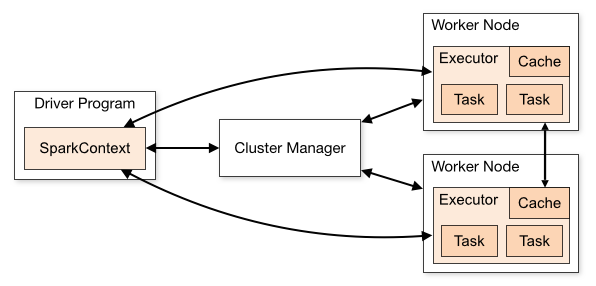

### Arquitectura y Funcionamiento de Spark

En lineas generales, se plantea una serie de cuestiones respecto al funcionamiento de Spark en función del esquema anterior:
1. Cada aplicación tiene sus propios _executor processes_, que permanecen activos durante toda la aplicación y ejecutan _tasks_ en varios subprocesos. Esto tiene la ventaja de aislar las aplicaciones entre sí, tanto en el lado de la programación (cada controlador programa sus propias tareas) como en el lado del ejecutor (las tareas de diferentes aplicaciones se ejecutan en diferentes JVM). Sin embargo, también significa que los datos no se pueden compartir entre diferentes aplicaciones Spark (instancias de SparkContext) sin escribirlos en un sistema de almacenamiento externo.
1. Spark es independiente del _cluster manager_ subyacente. Siempre que pueda adquirir _executor processes_ y estos se comuniquen entre sí, es relativamente fácil ejecutarlo incluso en un _cluster manager_ que también admita otras aplicaciones (por ejemplo, Mesos o YARN).
1. El _driver program_ debe escuchar y aceptar conexiones entrantes de sus ejecutores a lo largo de su vida. Como tal, el _driver program_ debe ser direccionable en red desde los _worker nodes_.
1. Debido a que el _driver_ programa tareas en el clúster, debe ejecutarse cerca de los _worker nodes_, preferiblemente en la misma red de área local.


## Programando en modo PySpark


Para comenzar a trabajar con PySpark, instalamos la librería pyspark, Java 8 y seteamos las variables de entorno para que no devuelva error:

In [ ]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=bd52008546b8f3f5e8325aecdfba69e71dfb705bb03be8c80b39ea751dc42d4e
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


Luego, inicializamos el Spark Context seteando el _master_ y el nombre de la aplicación.

El siguiente ejemplos muestra la forma mínima de inicializar un SparkContext, donde se pasan dos parámetros:
- Una URL de clúster, a saber, _local_ en el ejemplo, que le dice a Spark cómo conectarse a un clúster. En Spark, _local_ es un valor especial que ejecuta Spark en un _thread_ en la máquina local, sin conectarse a un clúster.
- Un nombre de aplicación, en nuestro caso _Conteo de palabras_. Este nombre identificará la aplicación en el _cluster manager_ si nos conectamos a un clúster.

In [ ]:
from pyspark.sql import  SparkSession

Spark =  SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

Spark

In [ ]:
#### Crear el Context

sc = Spark.sparkContext

Después de haber inicializado un SparkSession, ya podemos utilizar todos los métodos para crear y manipular RDDs, Dataframes, y Datasets que son las estructuras de datos presentes en Spark.

En primer lugar, tomamos el archivo de texto que vamos a procesar para hacer el conteo de palabras:

In [ ]:
# Leemos el archivo
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/guias/utiles/mapreduce_spark/mr_text-file.txt


--2024-02-10 04:33:07--  https://raw.githubusercontent.com/bdm-unlu/2020/master/guias/utiles/mapreduce_spark/mr_text-file.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1420 (1.4K) [text/plain]
Saving to: ‘mr_text-file.txt’

mr_text-file.txt    100%[===================>]   1.39K  --.-KB/s    in 0s      

2024-02-10 04:33:07 (20.6 MB/s) - ‘mr_text-file.txt’ saved [1420/1420]



## Trabajando con RDD's
Un RDD (Resilient Distributed Dataset) es una estructura fundamental en Apache Spark que representa una colección de datos inmutable y distribuida. Aquí tienes una explicación más detallada de lo que es un RDD:

Resiliente: El término "resiliente" se refiere a la capacidad de los RDD para tolerar fallos. Los datos en un RDD se almacenan en múltiples nodos del clúster, lo que significa que si un nodo falla, los datos todavía pueden recuperarse de los nodos restantes. Esto asegura la disponibilidad y la recuperación de datos en caso de problemas.

Distribuido: Los RDD se dividen en particiones y se almacenan en varios nodos de un clúster de Spark. Esto permite el procesamiento paralelo de datos en el clúster, lo que lleva a un alto rendimiento en el procesamiento de grandes conjuntos de datos.

Dataset: Un RDD es, en esencia, una colección de datos. Estos datos pueden ser de cualquier tipo, como números, texto, objetos complejos, etc. Spark proporciona funciones para realizar operaciones de transformación y acción en estos datos.

Inmutable: Los RDD son inmutables, lo que significa que una vez que se crea un RDD, no se pueden modificar sus datos. En cambio, puedes realizar transformaciones en un RDD para crear uno nuevo con los cambios deseados.

Transformaciones y Acciones: Los RDD admiten dos tipos principales de operaciones: transformaciones y acciones. Las transformaciones crean un nuevo RDD a partir de uno existente (por ejemplo, mapeo, filtrado o reducción), mientras que las acciones realizan cálculos en los datos y devuelven resultados (por ejemplo, contar, recopilar o guardar en disco).

 En Spark, todo el trabajo se expresa ya sea creando nuevos RDD, transformando RDD existentes o llamando a operaciones en RDD para calcular un resultado. Bajo el capó, Spark distribuye automáticamente los datos contenidos en los RDD en su clúster y paraleliza las operaciones que realiza en ellos. __Los RDD son el concepto central en Spark__.
<br />
<br />
Si bien en las últimas versiones de Spark (mediados de 2019) el RDD como estructura de manipulación de datos pierde protagonismo, las estructuras nuevas que son utilizadas como los DataFrames y los DataSets son en realidad abstracciones de estos RDD que siguen estando en el núcleo de Spark.
<br />
<br />

### Creación de RDD
Cada RDD se divide en varias particiones, que se pueden calcular en diferentes nodos del clúster. Los RDD pueden contener cualquier tipo de objetos Python, Java o Scala, incluidas las clases definidas por el usuario.

Es posbile crear RDD de dos maneras: cargando un conjunto de datos externo o distribuyendo una colección de objetos (por ejemplo, una lista o conjunto).

En este caso lo haremos a través de cargar un conjunto de datos externos con el método __sc.textFile()__:

In [ ]:
# Leo el archivo de texto

text_file = sc.textFile("mr_text-file.txt")

In [ ]:
text_file

mr_text-file.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

Una vez creados, los RDD ofrecen dos tipos de operaciones:
- Las __transformaciones__ construyen un nuevo RDD a partir de uno anterior.
- Las __acciones__, por otro lado, calculan un resultado basado en un RDD y lo devuelven al programa del controlador o lo guardan en un sistema de almacenamiento externo (por ejemplo, HDFS).

Las transformaciones y las acciones son diferentes debido a la forma en que Spark calcula los RDD. Aunque puede definir nuevos RDD en cualquier momento, Spark solo los computa de forma diferida, es decir, la primera vez que se utilizan en una acción. Este enfoque puede parecer inusual al principio, pero tiene mucho sentido cuando se trabaja con Big Data. Si Spark cargara y almacenara todas las líneas en el archivo tan pronto como escribiéramos _text_file = sc.textFile(...)_, desperdiciaría mucho espacio de almacenamiento o tiempo de procesamiento, dado que luego podemos filtrar  muchas líneas. En cambio, una vez que Spark ve la cadena completa de transformaciones, puede calcular solo los datos necesarios para su resultado.

### Acciones en Spark

A continuación se define un listado de las acciones más comunes y su utilización:
<br />-Para la columna __Result__ se calcula con un RDD con los valores {1, 2, 3, 3}.-

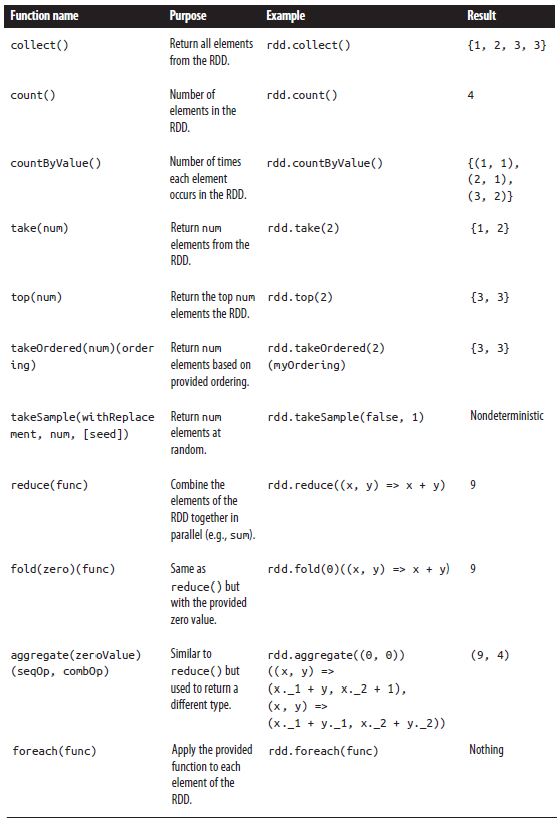

### Transformaciones en Spark

A continuación se define un listado de las transformaciones más comunes:
<br />-Para la columna __Result__ se calcula con un RDD con los valores {1, 2, 3, 3} en las operaciones unarias (map, flatMap, filter, distinct, sample) y para las binarias rdd={1, 2, 3} y other={3, 4, 5}.-

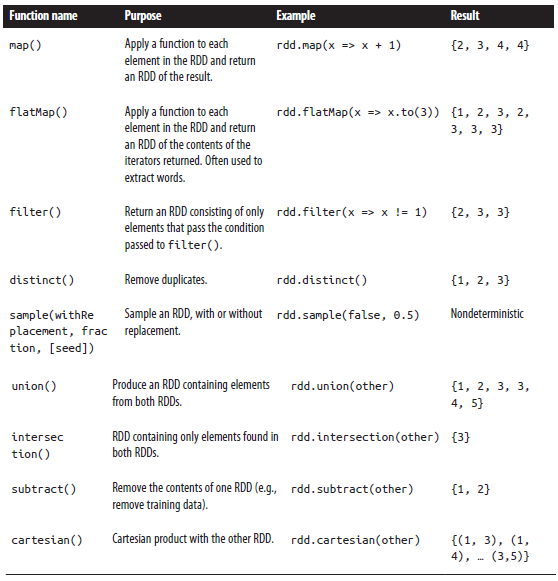

__Tip: ¿Cómo nos damos cuenta  si ejecutamos una transformación o una acción? Si la operación devuelve un RDD es transformación, de lo contrario es acción.__

Ahora que ocnocemos las RDD, las transformaciones y acciones, veamos como realizaríamos el _wordCount_ con Spark:

In [ ]:
# Separo en palabras
words = text_file.flatMap(lambda line: line.split(" "))

# Transformo a clave-valor
key_value = words.map(lambda word: (word, 1))

# Agrupo por clave
wordCounts = key_value.reduceByKey(lambda a,b:a +b)

# Muestro el primero
wordCounts.first()

# Muestro todos
for x in wordCounts.collect():
     print(x)

# Mostramos la cantidad
wordCounts.count()

('Aunque', 1)
('recién', 1)
('iniciará', 1)
('la', 12)
('octava', 1)
('fecha', 2)
('del', 5)
('torneo,', 1)
('el', 14)
('margen', 1)
('de', 12)
('error', 1)
('para', 2)
('Barcelona', 1)
('se', 2)
('reduce', 1)
('jornada', 2)
('a', 8)
('debido', 1)
('su', 4)
('irregular', 1)
('comienzo', 1)
('campeonato.', 1)
('En', 2)
('Estadio', 1)
('Mendizorroza,', 1)
('los', 1)
('catalanes', 1)
('buscan', 1)
('una', 1)
('victoria', 2)
('ante', 3)
('Alavés', 1)
('que', 5)
('les', 1)
('permita', 1)
('acomodarse', 1)
('dentro', 1)
('La', 1)
('Liga.', 1)
('Televisa', 1)
('ESPN', 1)
('2.', 1)
('', 3)
('Los', 1)
('catalanes,', 1)
('pese', 1)
('buen', 1)
('andar', 1)
('en', 6)
('plano', 1)
('internacional', 1)
('(goleada', 1)
('por', 2)
('5', 1)
('1', 1)
('Ferencvaros', 1)
('y', 6)
('2', 1)
('0', 1)
('Juventus', 1)
('Turín),', 1)
('certamen', 1)
('doméstico', 1)
('no', 2)
('encuentran', 1)
('rumbo,', 1)
('al', 4)
('cosechar', 1)
('solamente', 1)
('dos', 2)
('victorias,', 1)
('un', 1)
('empate', 1)
('derrot

157

Finalmente, para apagar Spark, debemos llamaar al método stop () del SparkContext, en nuestro caso la variable _sc_:



In [ ]:
sc.stop()

Veamos un pequeño tutorial de como podemos usar Spark

### 1. Punto de Partida: SparkSession

En Spark, todo comienza con una instancia de `SparkSession`. Es la puerta de entrada a todas las funcionalidades que ofrece Spark. Aquí está cómo puedes crear una `SparkSession` básica:


In [ ]:
%%capture
#pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Ejemplo Básico de SQL con PySpark") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


`SparkSession.builder` nos permite configurar opciones como el nombre de la aplicación y parámetros de configuración específicos. Esto es esencial para inicializar cualquier trabajo que deseas realizar con Spark.

### 2. Creación de DataFrames

Con `SparkSession`, puedes crear DataFrames a partir de un RDD existente, de una tabla de Hive, o de fuentes de datos de Spark. Por ejemplo, para crear un DataFrame a partir del contenido de un archivo JSON:


In [ ]:
!wget https://raw.githubusercontent.com/jazaineam1/BigDataMINE2023/main/data/Pyspark/empleados.json
!hdfs dfs -put  empleados.json /user/root/

--2024-05-02 22:25:05--  https://raw.githubusercontent.com/jazaineam1/BigDataMINE2023/main/data/Pyspark/empleados.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205 [text/plain]
Saving to: ‘empleados.json’

empleados.json      100%[===================>]     205  --.-KB/s    in 0s      

2024-05-02 22:25:05 (8.38 MB/s) - ‘empleados.json’ saved [205/205]

/bin/bash: line 1: hdfs: command not found


In [ ]:
df = spark.read.json("empleados.json")
df.show()

+----+---+------+----------+-------+---------+
|Edad| Id|Nombre| Profesión|Salario|     Sexo|
+----+---+------+----------+-------+---------+
|  33|  1|  Juan| Ingeniero|4500000|Masculino|
|  38|  2|   Ana|Arquitecta|6200000| Femenino|
+----+---+------+----------+-------+---------+



In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame


### 3. Operaciones con DataFrames (Operaciones de Dataset sin tipar)

Los DataFrames proporcionan un lenguaje específico del dominio para la manipulación de datos estructurados. En Python, puedes acceder a las columnas de un DataFrame por atributo (como `df.age`) o por índice (como `df['age']`). Aquí hay algunos ejemplos básicos:


In [ ]:
# spark y df son del ejemplo anterior
# Imprimir el esquema en formato de árbol
df.printSchema()

# Seleccionar solo la columna "Nombre"
df.select("Nombre").show()

# Seleccionar a todos, pero incrementar iD en 1
df.select(df['NOmbre'], df['Id'] + 1).show()

# Filtrar personas mayores de 21 años
df.filter(df['Id'] > 2).show()

# Contar personas por Nombre
df.groupBy("Nombre").count().show()

root
 |-- Edad: long (nullable = true)
 |-- Id: long (nullable = true)
 |-- Nombre: string (nullable = true)
 |-- Profesión: string (nullable = true)
 |-- Salario: long (nullable = true)
 |-- Sexo: string (nullable = true)

+------+
|Nombre|
+------+
|  Juan|
|   Ana|
+------+

+------+--------+
|NOmbre|(Id + 1)|
+------+--------+
|  Juan|       2|
|   Ana|       3|
+------+--------+

+----+---+------+---------+-------+----+
|Edad| Id|Nombre|Profesión|Salario|Sexo|
+----+---+------+---------+-------+----+
+----+---+------+---------+-------+----+

+------+-----+
|Nombre|count|
+------+-----+
|   Ana|    1|
|  Juan|    1|
+------+-----+



### 4. Ejecución Programática de Consultas SQL

Puedes ejecutar consultas SQL programáticamente y obtener los resultados como un DataFrame. Primero, debes registrar el DataFrame como una vista temporal:


In [ ]:
df.createOrReplaceTempView("people")

sqlDF = spark.sql("SELECT * FROM people")
sqlDF.show()

+----+---+------+----------+-------+---------+
|Edad| Id|Nombre| Profesión|Salario|     Sexo|
+----+---+------+----------+-------+---------+
|  33|  1|  Juan| Ingeniero|4500000|Masculino|
|  38|  2|   Ana|Arquitecta|6200000| Femenino|
+----+---+------+----------+-------+---------+




### 5. Vista Temporal Global

Las vistas temporales en SQL de Spark son específicas de la sesión y desaparecerán si la sesión que las crea termina. Para crear una vista que sea compartida entre todas las sesiones y que persista hasta que la aplicación de Spark termine, puedes crear una vista temporal global:


In [ ]:
df.createGlobalTempView("people")

# La vista temporal global está ligada a la base de datos preservada por el sistema `global_temp`
spark.sql("SELECT * FROM global_temp.people").show()

# La vista temporal global es entre sesiones
spark.newSession().sql("SELECT * FROM global_temp.people").show()

+----+---+------+----------+-------+---------+
|Edad| Id|Nombre| Profesión|Salario|     Sexo|
+----+---+------+----------+-------+---------+
|  33|  1|  Juan| Ingeniero|4500000|Masculino|
|  38|  2|   Ana|Arquitecta|6200000| Femenino|
+----+---+------+----------+-------+---------+

+----+---+------+----------+-------+---------+
|Edad| Id|Nombre| Profesión|Salario|     Sexo|
+----+---+------+----------+-------+---------+
|  33|  1|  Juan| Ingeniero|4500000|Masculino|
|  38|  2|   Ana|Arquitecta|6200000| Femenino|
+----+---+------+----------+-------+---------+



In [ ]:
data = [
    {"nombre": "Carlos", "edad": 30, "ciudad": "Madrid"},
    {"nombre": "Ana", "edad": 22, "ciudad": "Barcelona"},
    {"nombre": "Luis", "edad": 19, "ciudad": "Sevilla"}
]


# Crear DataFrame
df2 = spark.createDataFrame(data)

# Mostrar el DataFrame
df2.show()


+---------+----+------+
|   ciudad|edad|nombre|
+---------+----+------+
|   Madrid|  30|Carlos|
|Barcelona|  22|   Ana|
|  Sevilla|  19|  Luis|
+---------+----+------+



In [ ]:
spark.stop()

## Referencias

1. Learning Spark - Holden Karau, Andy Konwinski, Patrick Wendell and Matei Zaharia.  O’Reilly Media, Inc. 2015. ISBN 978-1-449-35862-4
1. Spark Overview. http://spark.apache.org/docs/latest/
1. PySpark – Word Count Example. https://pythonexamples.org/pyspark-word-count-example/
1. A Neanderthal’s Guide to Apache Spark in Python https://towardsdatascience.com/a-neanderthals-guide-to-apache-spark-in-python-9ef1f156d427
5.